### Notebook 3 - technology graph topology analysis (solution 2)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import os
import warnings
warnings.filterwarnings('ignore')
centr_folder = '/Users/koshelev/Documents/lmu/thesis/2-centralities_computation/computed_centralities/technology2/'
output_folder = 'centrality_ranking_visual/technology2/'

general graph topology analysis

In [2]:
graph_descr = pd.read_csv('/Users/koshelev/Documents/lmu/thesis/3-graph_description/graph_descriptions/technology2.csv', index_col=0)
graph_descr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1975 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nodes         25 non-null     int64  
 1   edges         25 non-null     int64  
 2   degrees_w     25 non-null     float64
 3   degrees_nw    25 non-null     float64
 4   alcc_nw       25 non-null     float64
 5   spl_nw        25 non-null     float64
 6   algebrcon_nw  25 non-null     float64
 7   deg_centr     25 non-null     float64
dtypes: float64(6), int64(2)
memory usage: 1.8 KB


In [3]:
graph_descr.describe()

nodes        edges     degrees_w  degrees_nw    alcc_nw     spl_nw  \
count   25.00000    25.000000     25.000000   25.000000  25.000000  25.000000   
mean   103.52000  1140.440000  10180.181443   21.781174   0.716218   1.277967   
std     12.85859   268.468353   5405.963252    2.586996   0.023642   0.059007   
min     89.00000   820.000000   4074.674157   18.226804   0.666240   1.181200   
25%     95.00000   888.000000   5778.282828   19.313131   0.705287   1.233755   
50%     99.00000  1119.000000   9259.171717   22.606061   0.714217   1.268273   
75%    109.00000  1261.000000  13147.266055   23.828571   0.729242   1.321251   
max    137.00000  1755.000000  22339.921875   25.781250   0.767123   1.396737   

       algebrcon_nw  deg_centr  
count     25.000000  25.000000  
mean       0.911888   0.213037  
std        0.068864   0.015516  
min        0.590353   0.188386  
25%        0.916124   0.202580  
50%        0.927654   0.209397  
75%        0.933691   0.221723  
max        0.951297   0.249703

In [4]:
graph_descr.head()

nodes  edges    degrees_w  degrees_nw   alcc_nw    spl_nw  algebrcon_nw  \
1975     92    848  4675.543478   18.434783  0.696479  1.380674      0.905301   
1976     92    874  4954.478261   19.000000  0.736404  1.263856      0.932424   
1977     97    884  4602.474227   18.226804  0.736185  1.281250      0.931246   
1978     90    888  5210.177778   19.733333  0.714217  1.355556      0.590353   
1979     89    820  4074.674157   18.426966  0.713620  1.228677      0.941732   

      deg_centr  
1975   0.202580  
1976   0.208791  
1977   0.189863  
1978   0.221723  
1979   0.209397

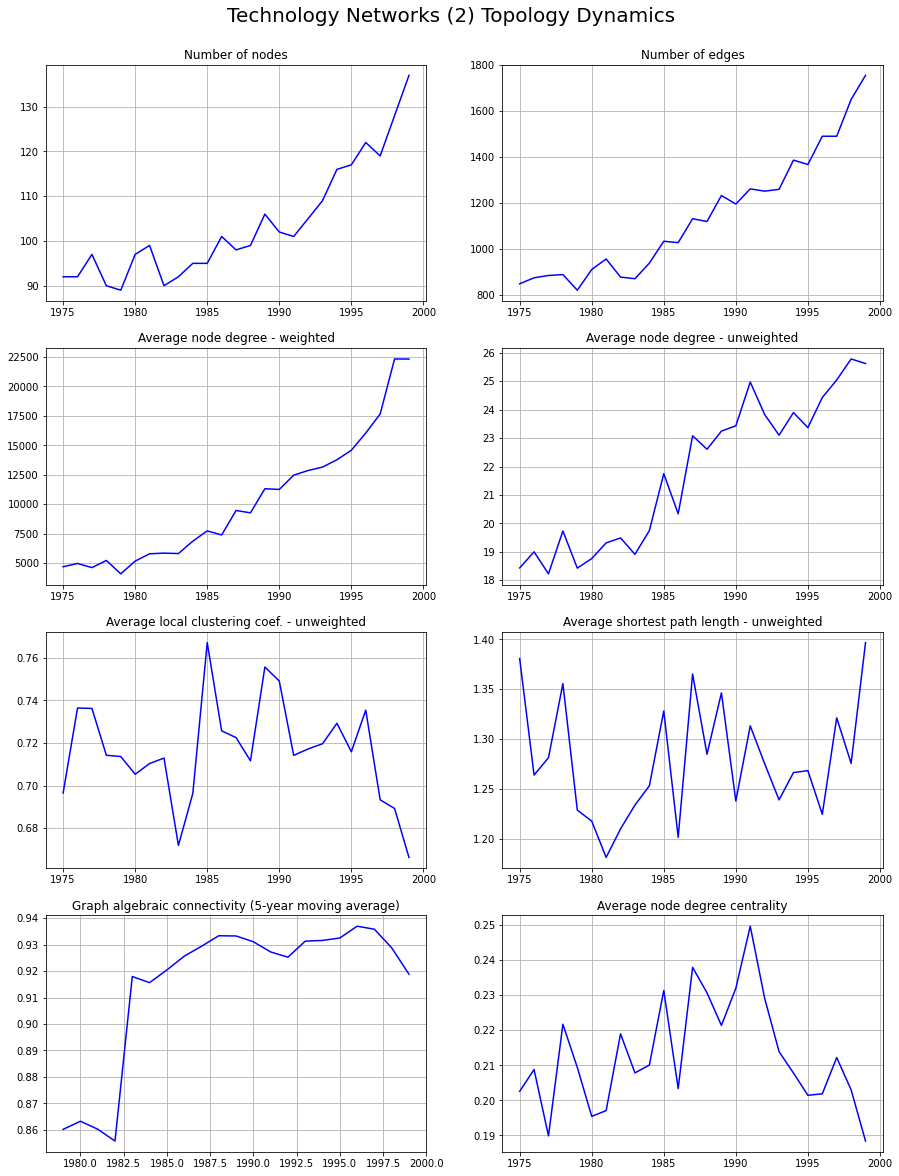

In [5]:
figure, axis = plt.subplots(4, 2, figsize=(15, 20))
figure.suptitle('Technology Networks (2) Topology Dynamics', fontsize=20, y=0.92)

axis[0, 0].plot(graph_descr['nodes'], color='blue')
axis[0, 0].set_title('Number of nodes')
axis[0, 0].grid()

axis[0, 1].plot(graph_descr['edges'], color='blue')
axis[0, 1].set_title('Number of edges')
axis[0, 1].grid()
  
axis[1, 0].plot(graph_descr['degrees_w'], color='blue')
axis[1, 0].set_title('Average node degree - weighted')
axis[1, 0].grid()

axis[1, 1].plot(graph_descr['degrees_nw'], color='blue')
axis[1, 1].set_title('Average node degree - unweighted')
axis[1, 1].grid()
  
axis[2, 0].plot(graph_descr['alcc_nw'], color='blue')
axis[2, 0].set_title('Average local clustering coef. - unweighted')
axis[2, 0].grid()

axis[2, 1].plot(graph_descr['spl_nw'], color='blue')
axis[2, 1].set_title('Average shortest path length - unweighted')
axis[2, 1].grid()
  
# Graph algebraic connectivity and average node degree 
axis[3, 0].plot(graph_descr['algebrcon_nw'].rolling(5).mean(), color='blue')
axis[3, 0].set_title('Graph algebraic connectivity (5-year moving average)')
axis[3, 0].grid()

# Graph algebraic connectivity and average node degree 
axis[3, 1].plot(graph_descr['deg_centr'], color='blue')
axis[3, 1].set_title('Average node degree centrality')
axis[3, 1].grid()

plt.savefig('topology_dynamics_visual/technology2.pdf', bbox_inches='tight')

# Combine all the operations and display
plt.show()

node centrality analysis

In [6]:
centr_types = []
centr_dfs = []
centr_rank_dfs = []
for filename in os.listdir(centr_folder):
    centr_types.append(filename[:-4])
    print(filename[:-4])
    centr_dfs.append(pd.read_csv(centr_folder+filename, index_col=0).sort_values(by=1999, axis=1, ascending=False))
    centr_rank_dfs.append((centr_dfs[-1] * (-1)).rank(axis=1))

betweenness_centr_uw
pagerank_centr_uw
degree_centr
pagerank_centr
eigenv_centr
eigenv_centr_uw
closeness_centr
betweenness_centr


In [7]:
centrality_names = {
    'betweenness_centr_uw' : 'Betweenness Centrality - Unweighted',
    'betweenness_centr' : 'Betweenness Centrality - Weighted',
    'pagerank_centr_uw' : 'PageRank Centrality - Unweighted',
    'degree_centr' : 'Degree Centrality - Weighted',
    'pagerank_centr' : 'PageRank Centrality - Weighted',
    'eigenv_centr' : 'Eigenvector Centrality - Weighted',
    'eigenv_centr_uw' : 'Eigenvector Centrality - Unweighted',
    'closeness_centr' : 'Closeness Centrality - Weighted' 
}

In [8]:
def plot_bumpchart(df, title, topN=20):
    df.fillna(method='ffill', inplace=True)
    plt.figure(figsize=(50, 22))
    ax = plt.subplot()
    colors = list(plt.cm.tab20_r(np.arange(20)))
    ax.set_prop_cycle('color', colors)
    plt.gca().invert_yaxis()
    plt.plot(df.iloc[5:, :topN], 'o-', linewidth=2)
    plt.legend(df.columns[:topN], loc="lower center", ncol=len(df.columns[:topN]), fontsize=20)
    plt.yticks(np.arange(1, 41, 1.0), fontsize=20)
    plt.ylim(43, 0)
    plt.xticks(fontsize=20)
    plt.xlim(df.index[5], df.index[-1])
    loc = plticker.MultipleLocator(base=1.0)
    ax.xaxis.set_major_locator(loc)
    plt.xlabel('Year', fontsize=40)
    plt.ylabel('Centrality Rank', fontsize=40)
    plt.grid(axis='x')
    plt.title(centrality_names[title], fontsize=40)
    plt.savefig(f'{output_folder}{title}_top{topN}.pdf', bbox_inches='tight')
    plt.show()

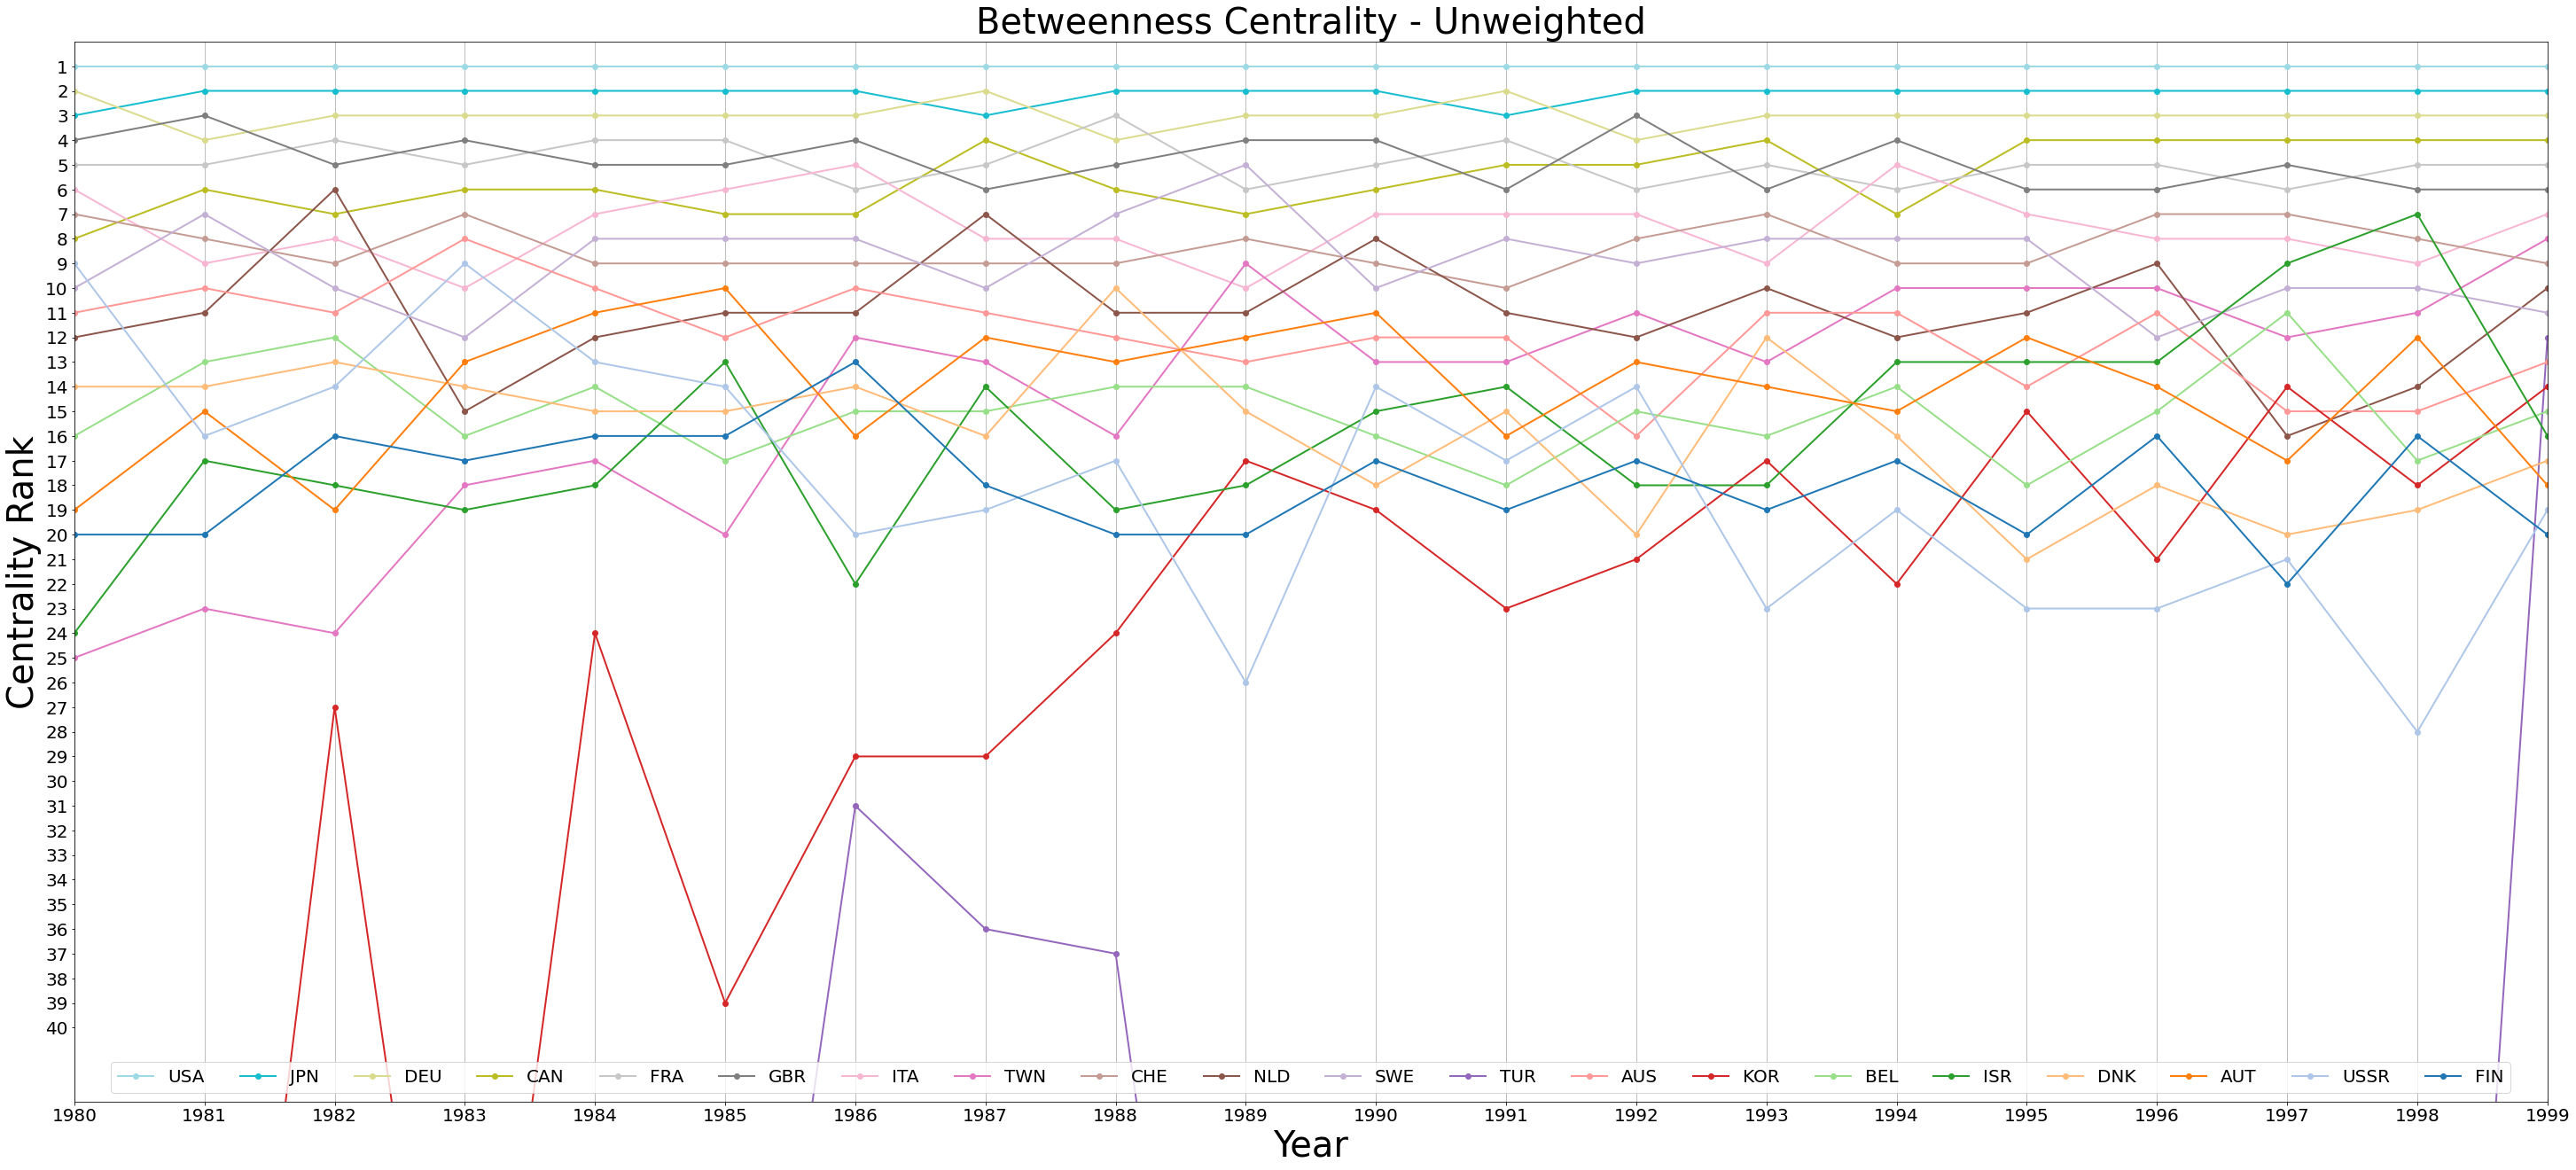

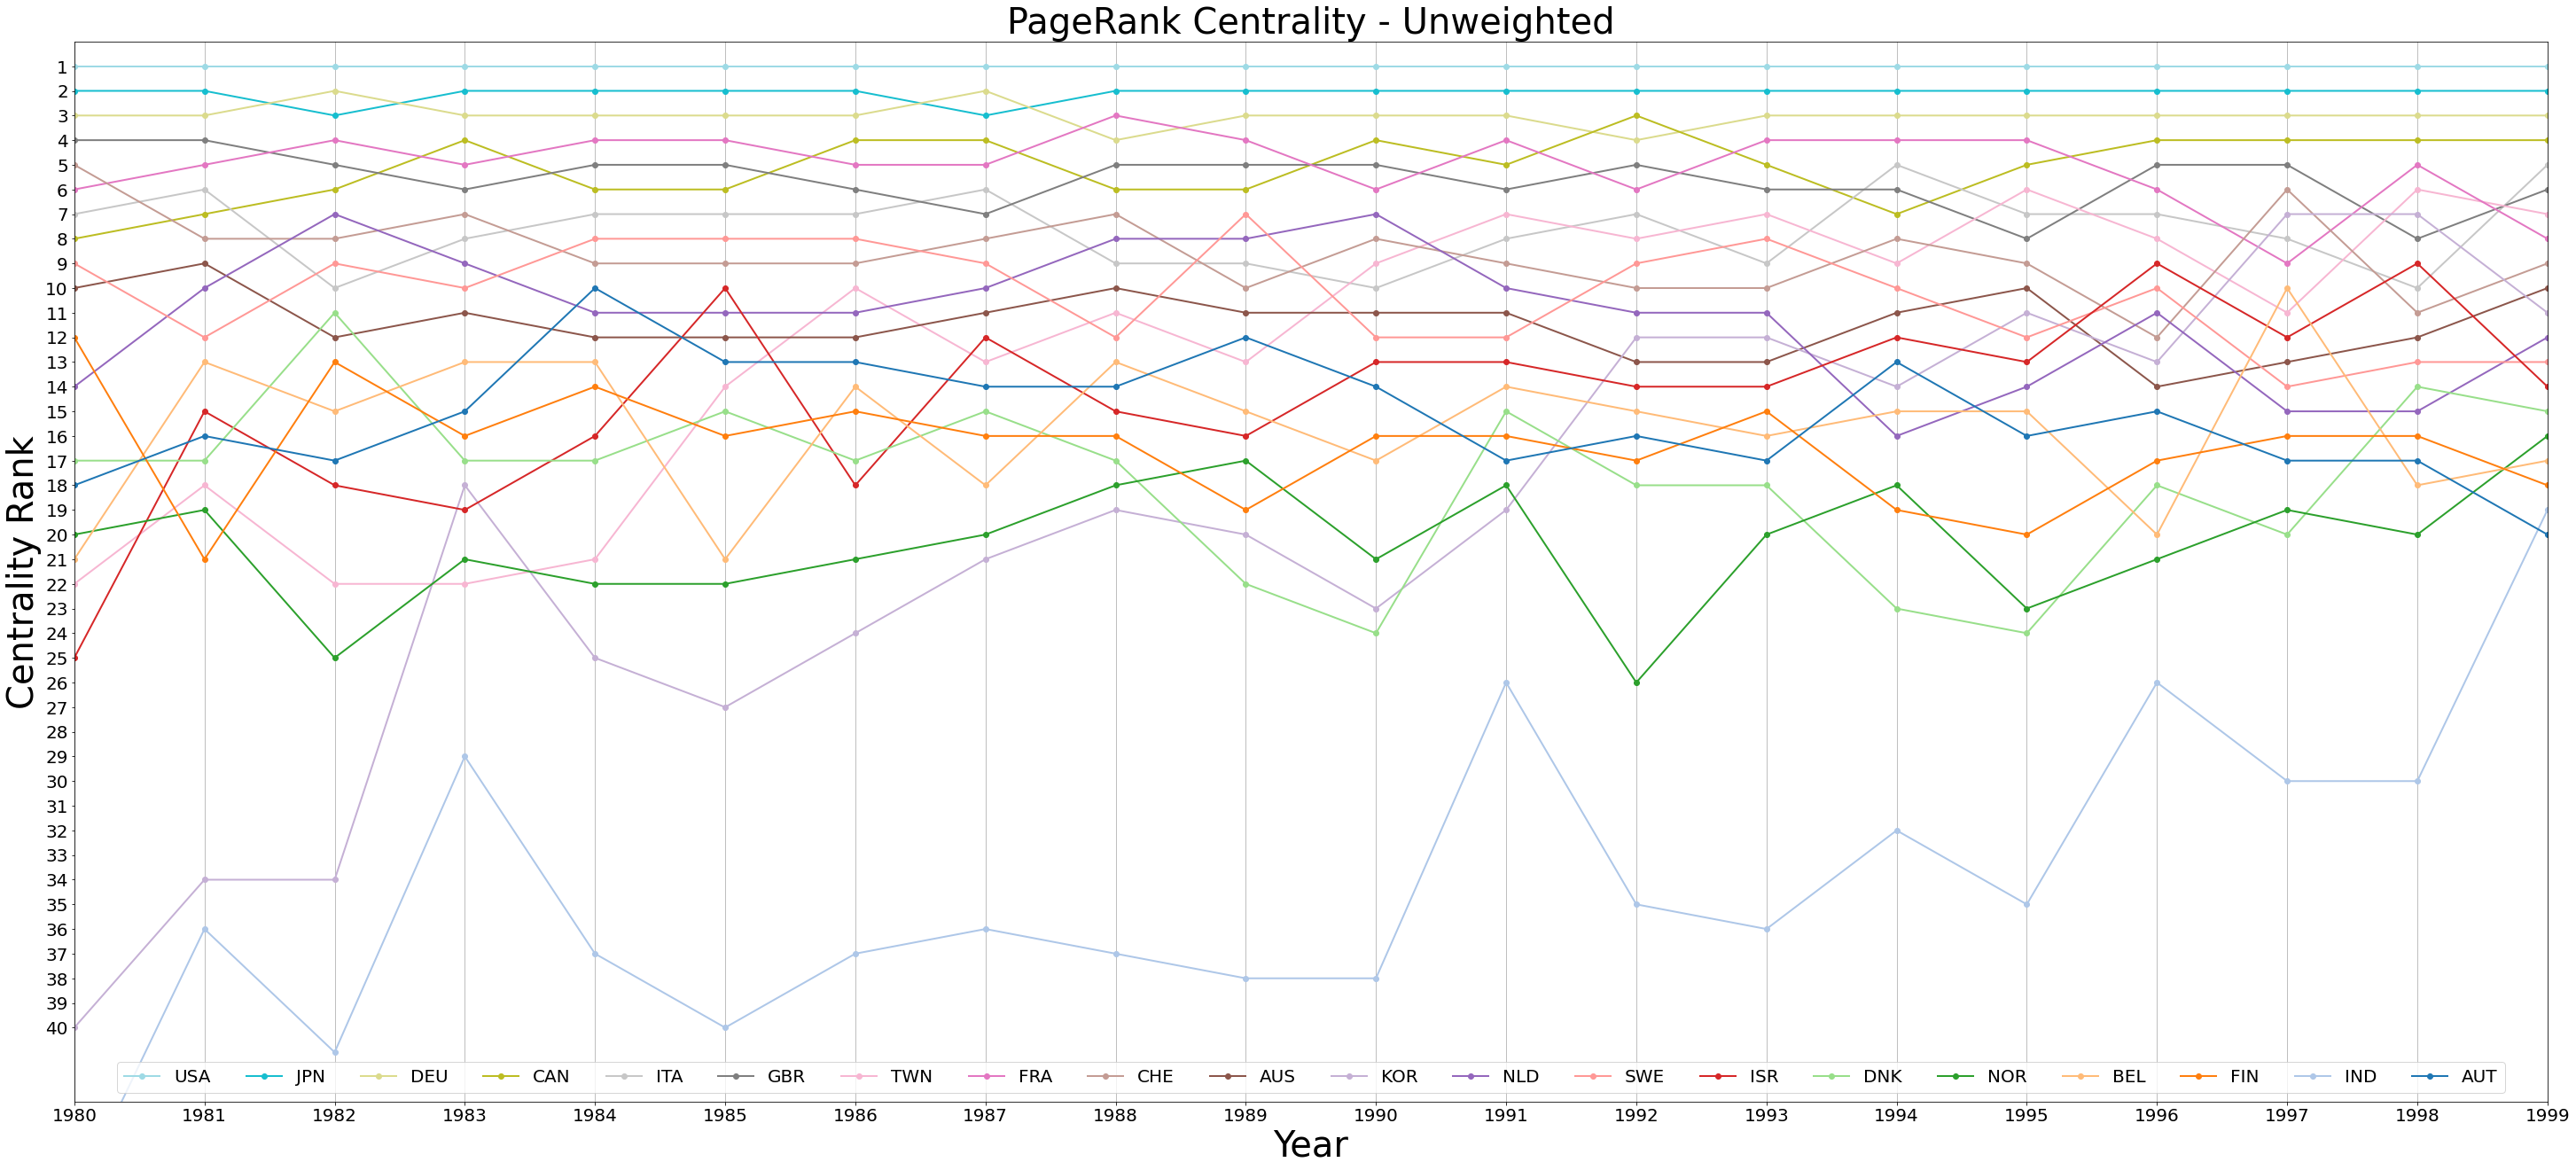

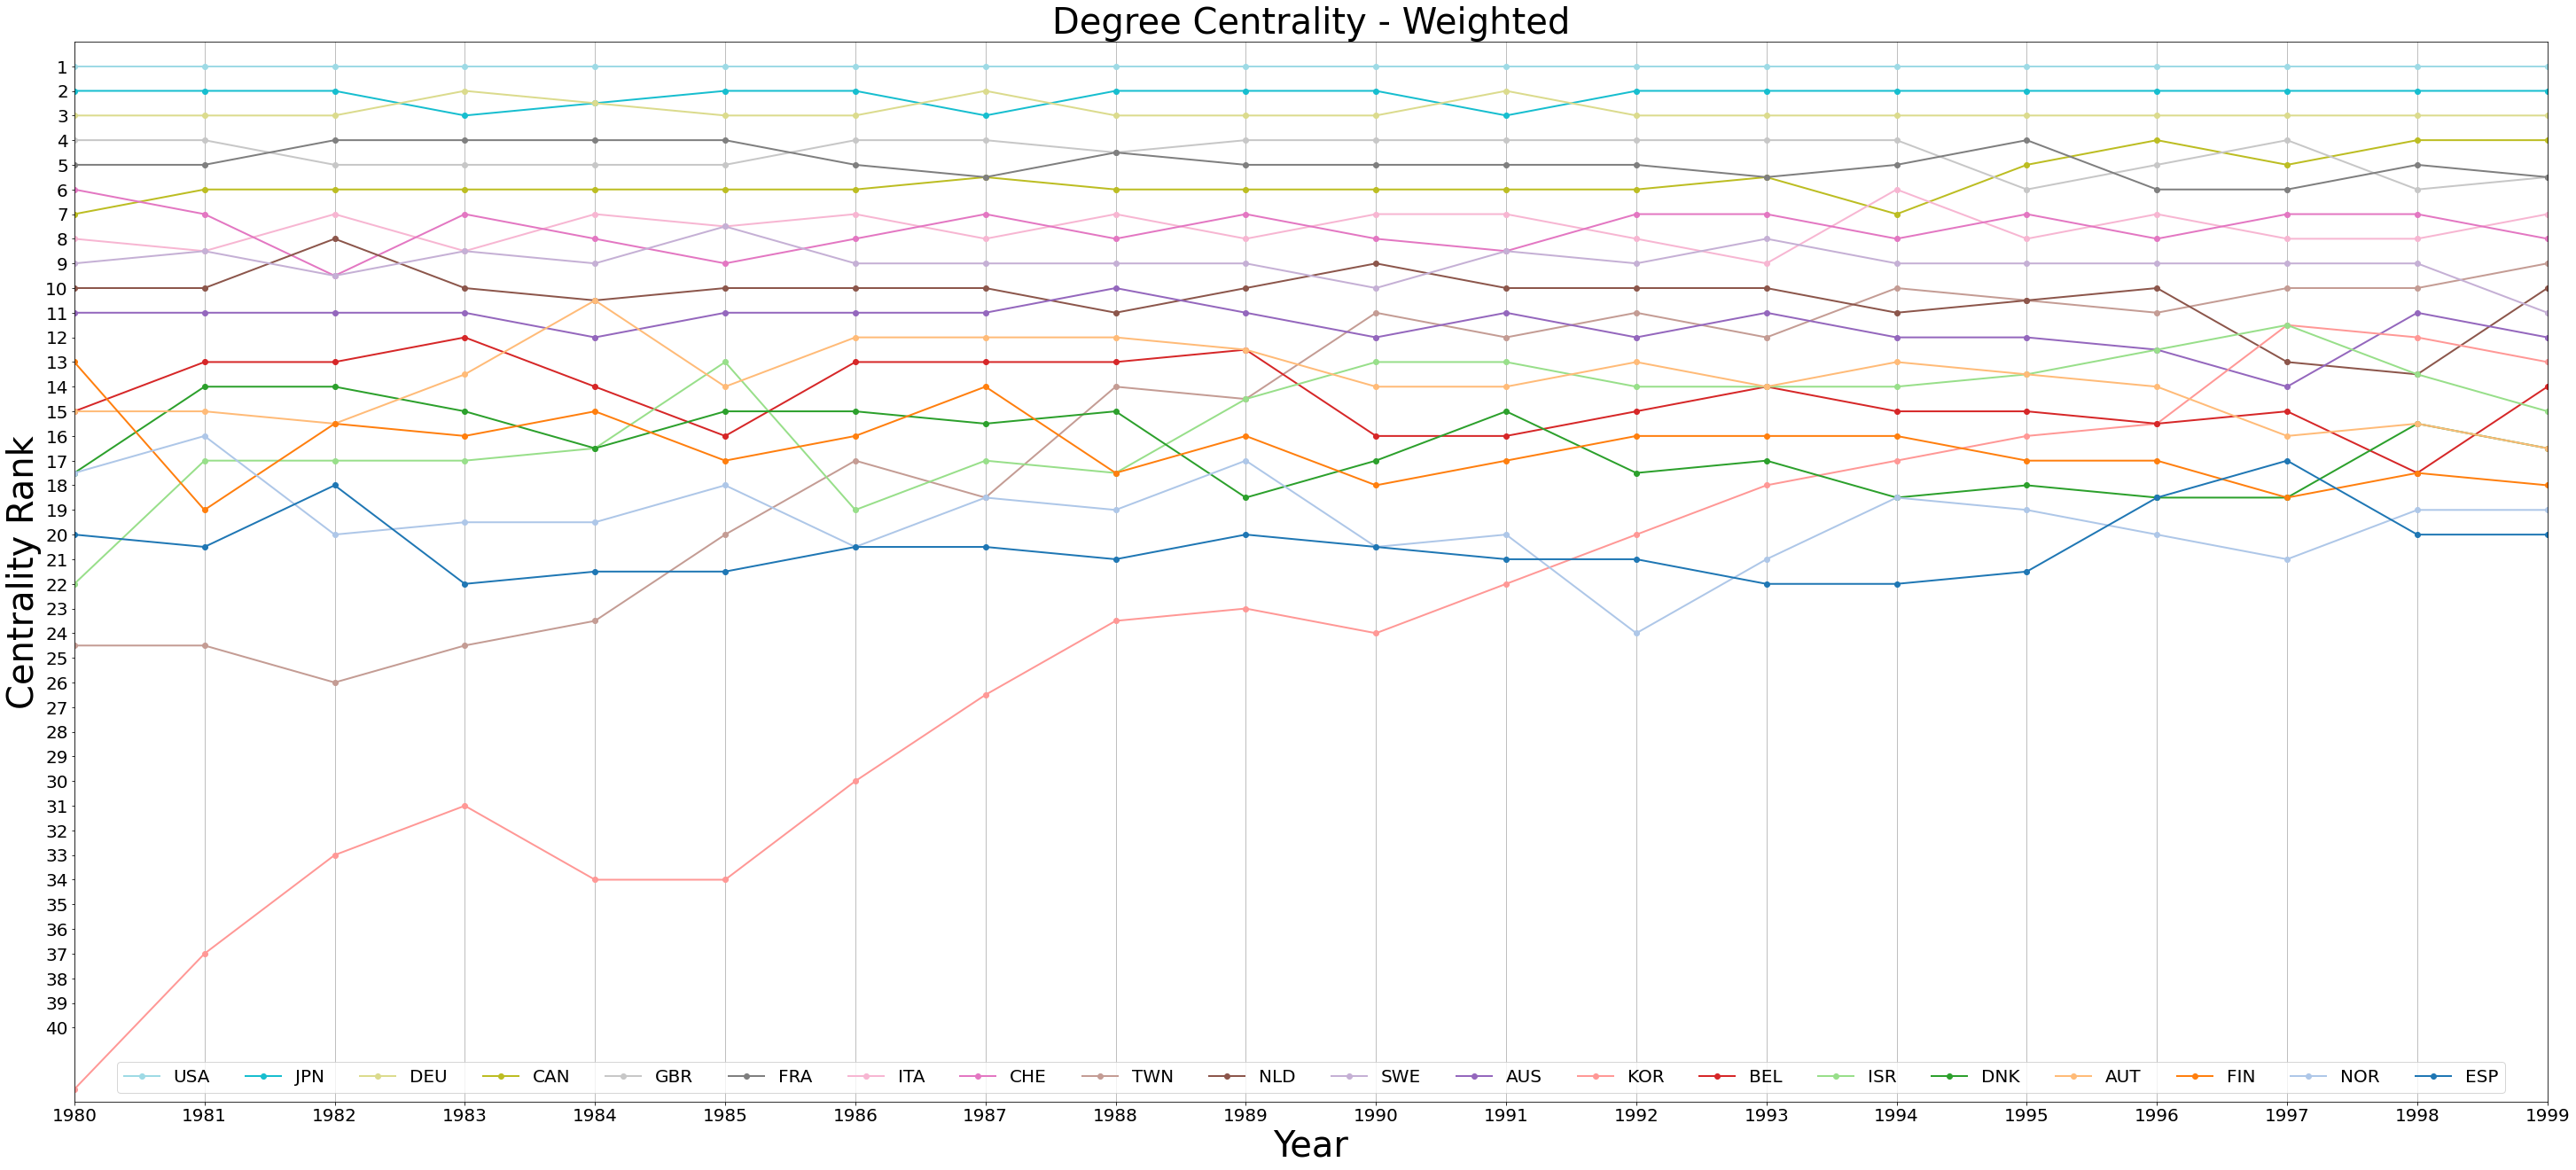

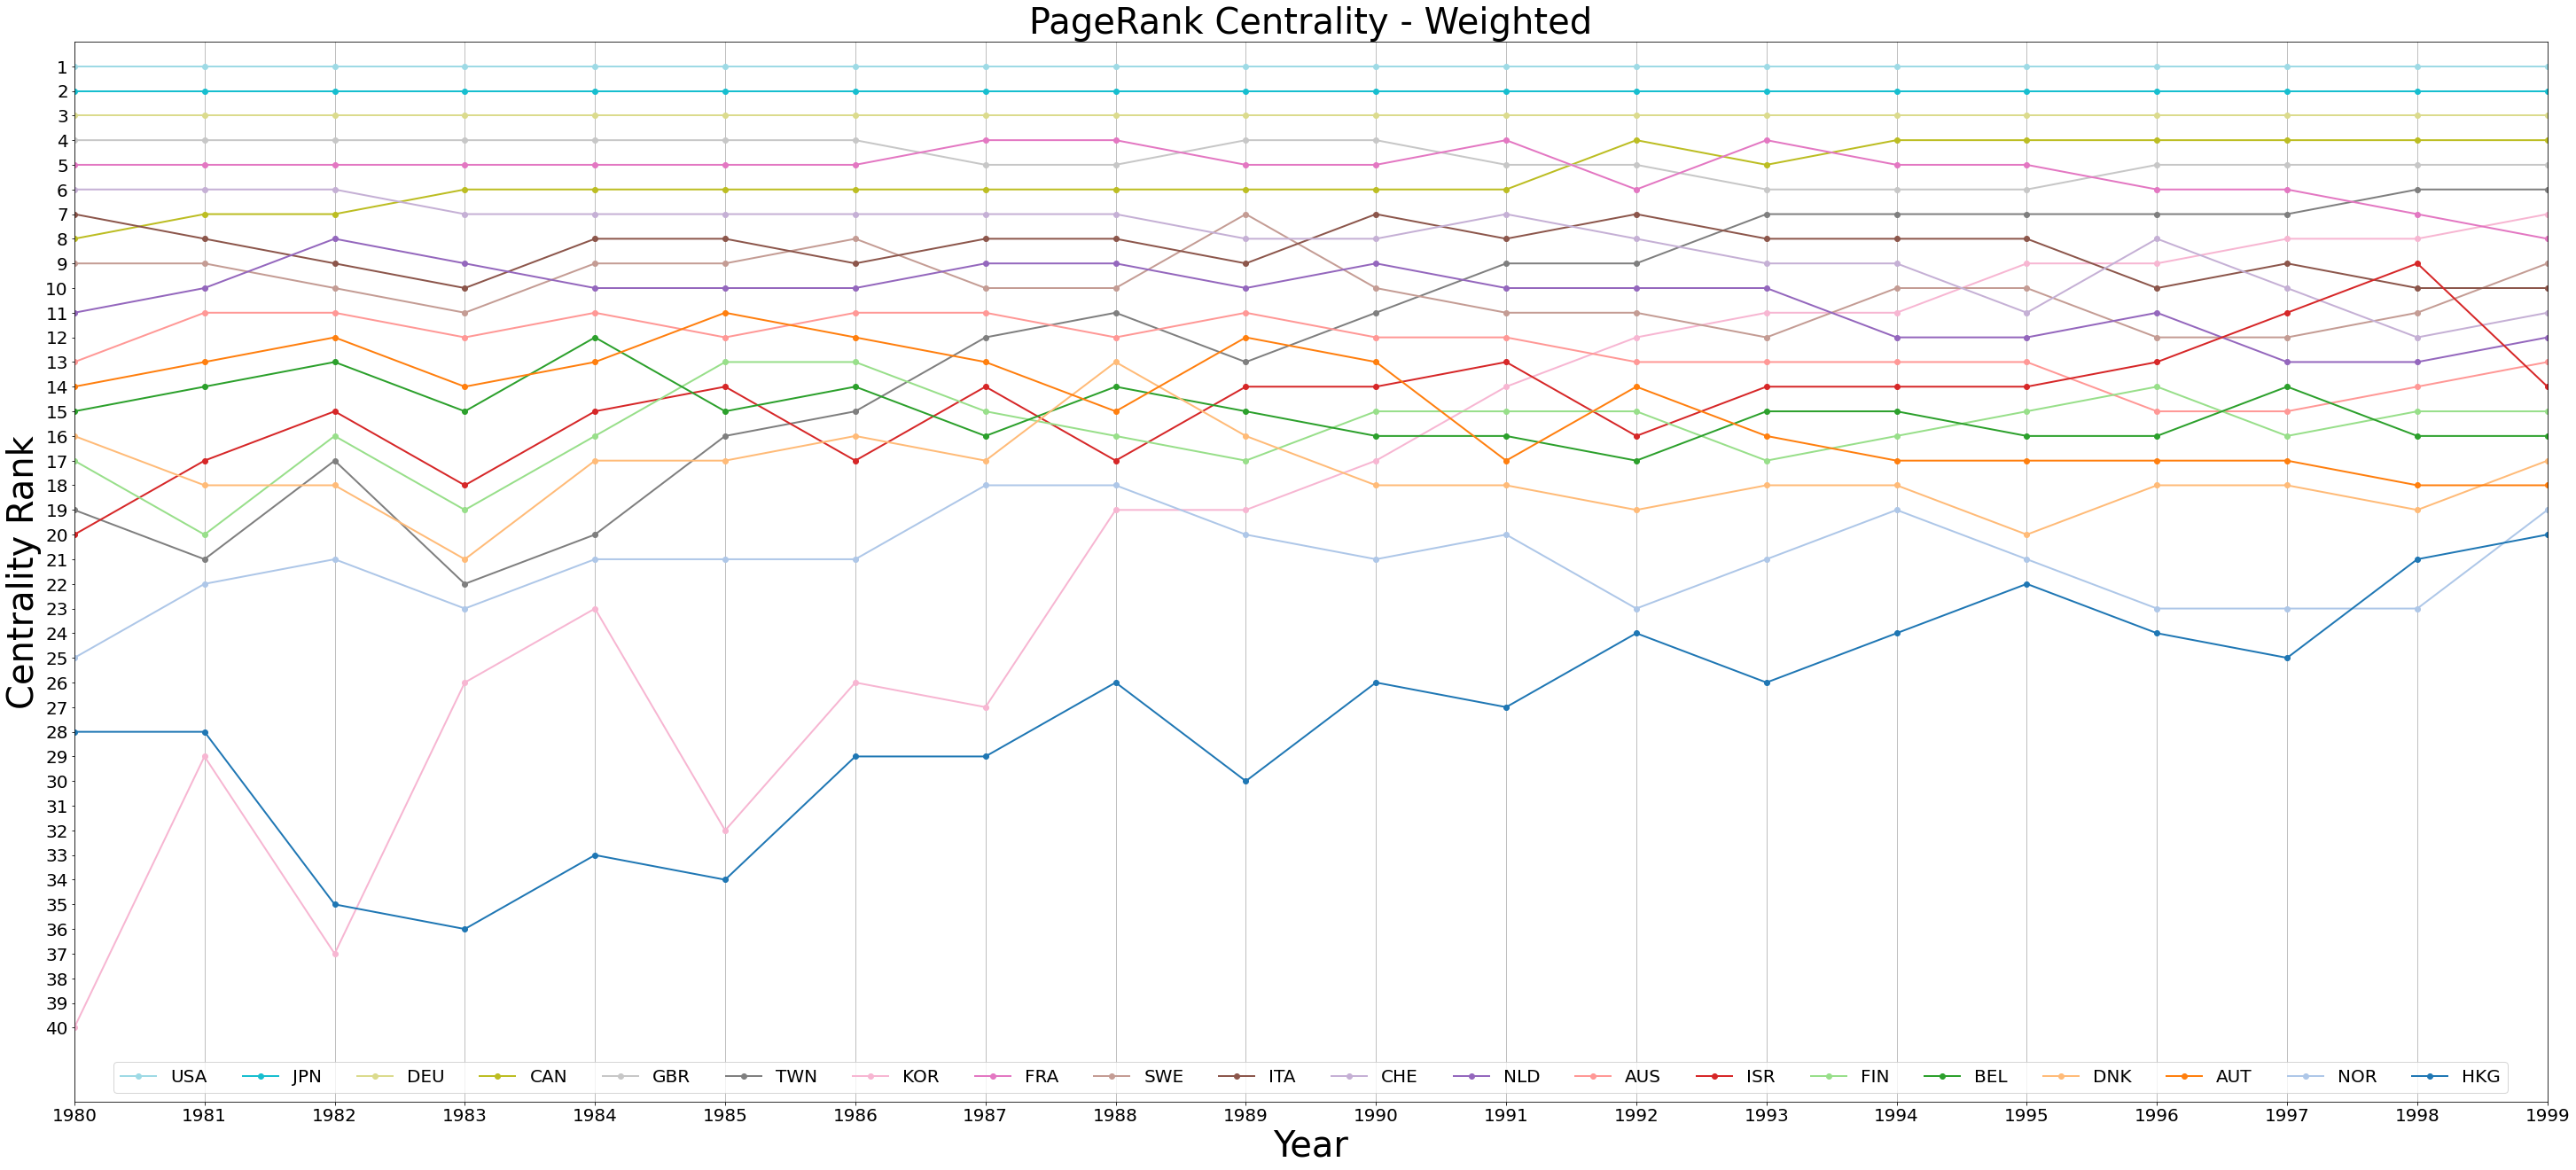

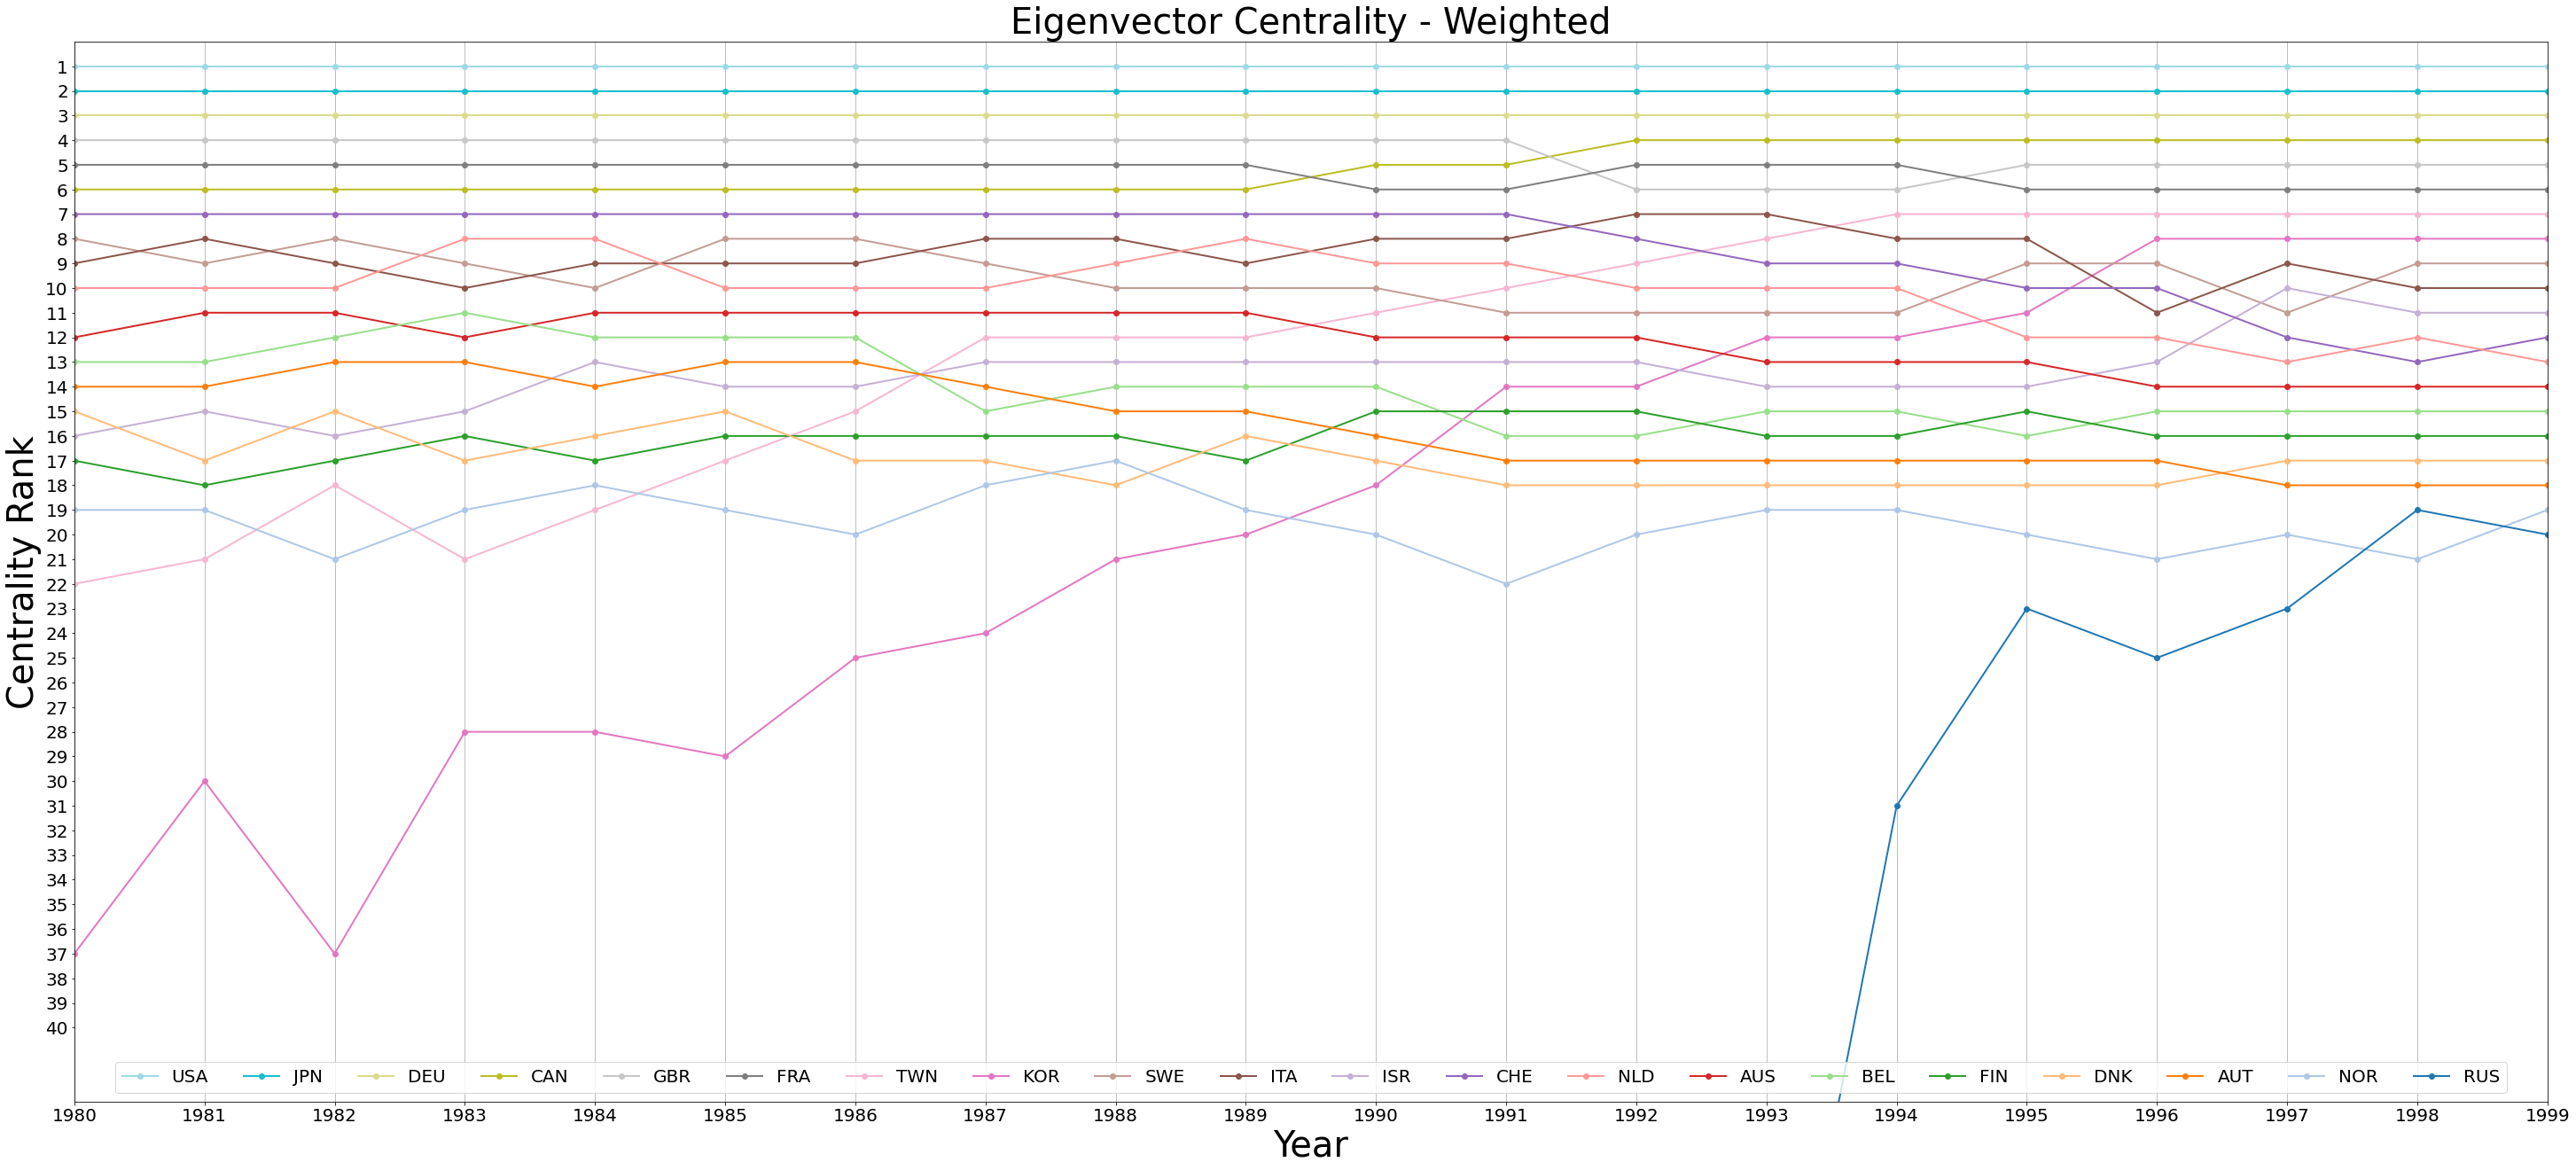

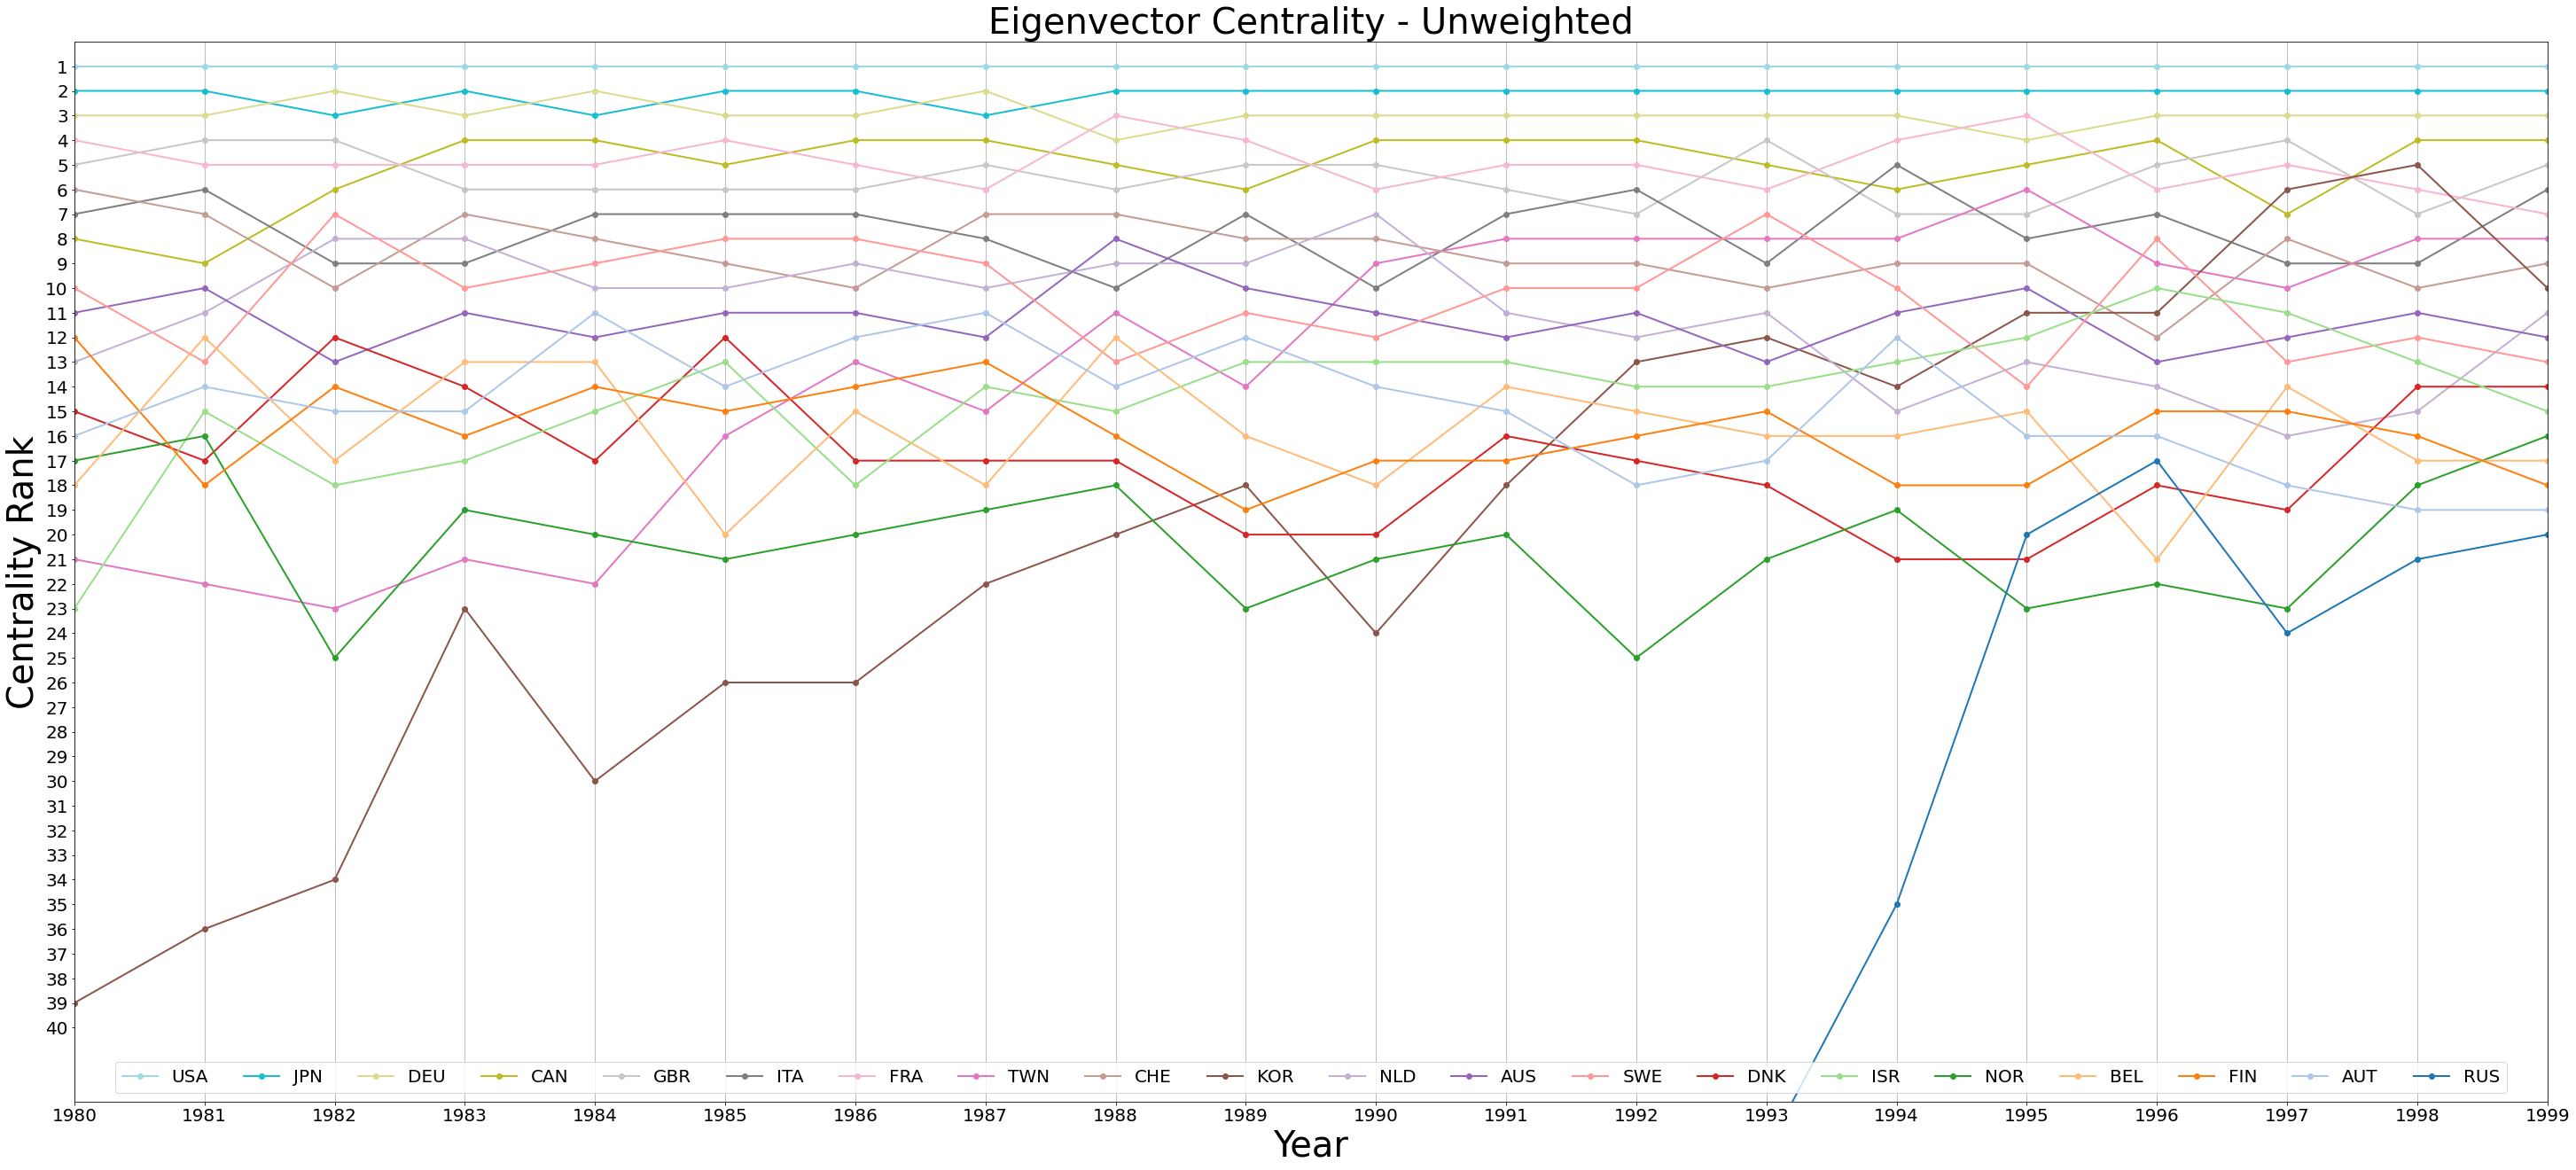

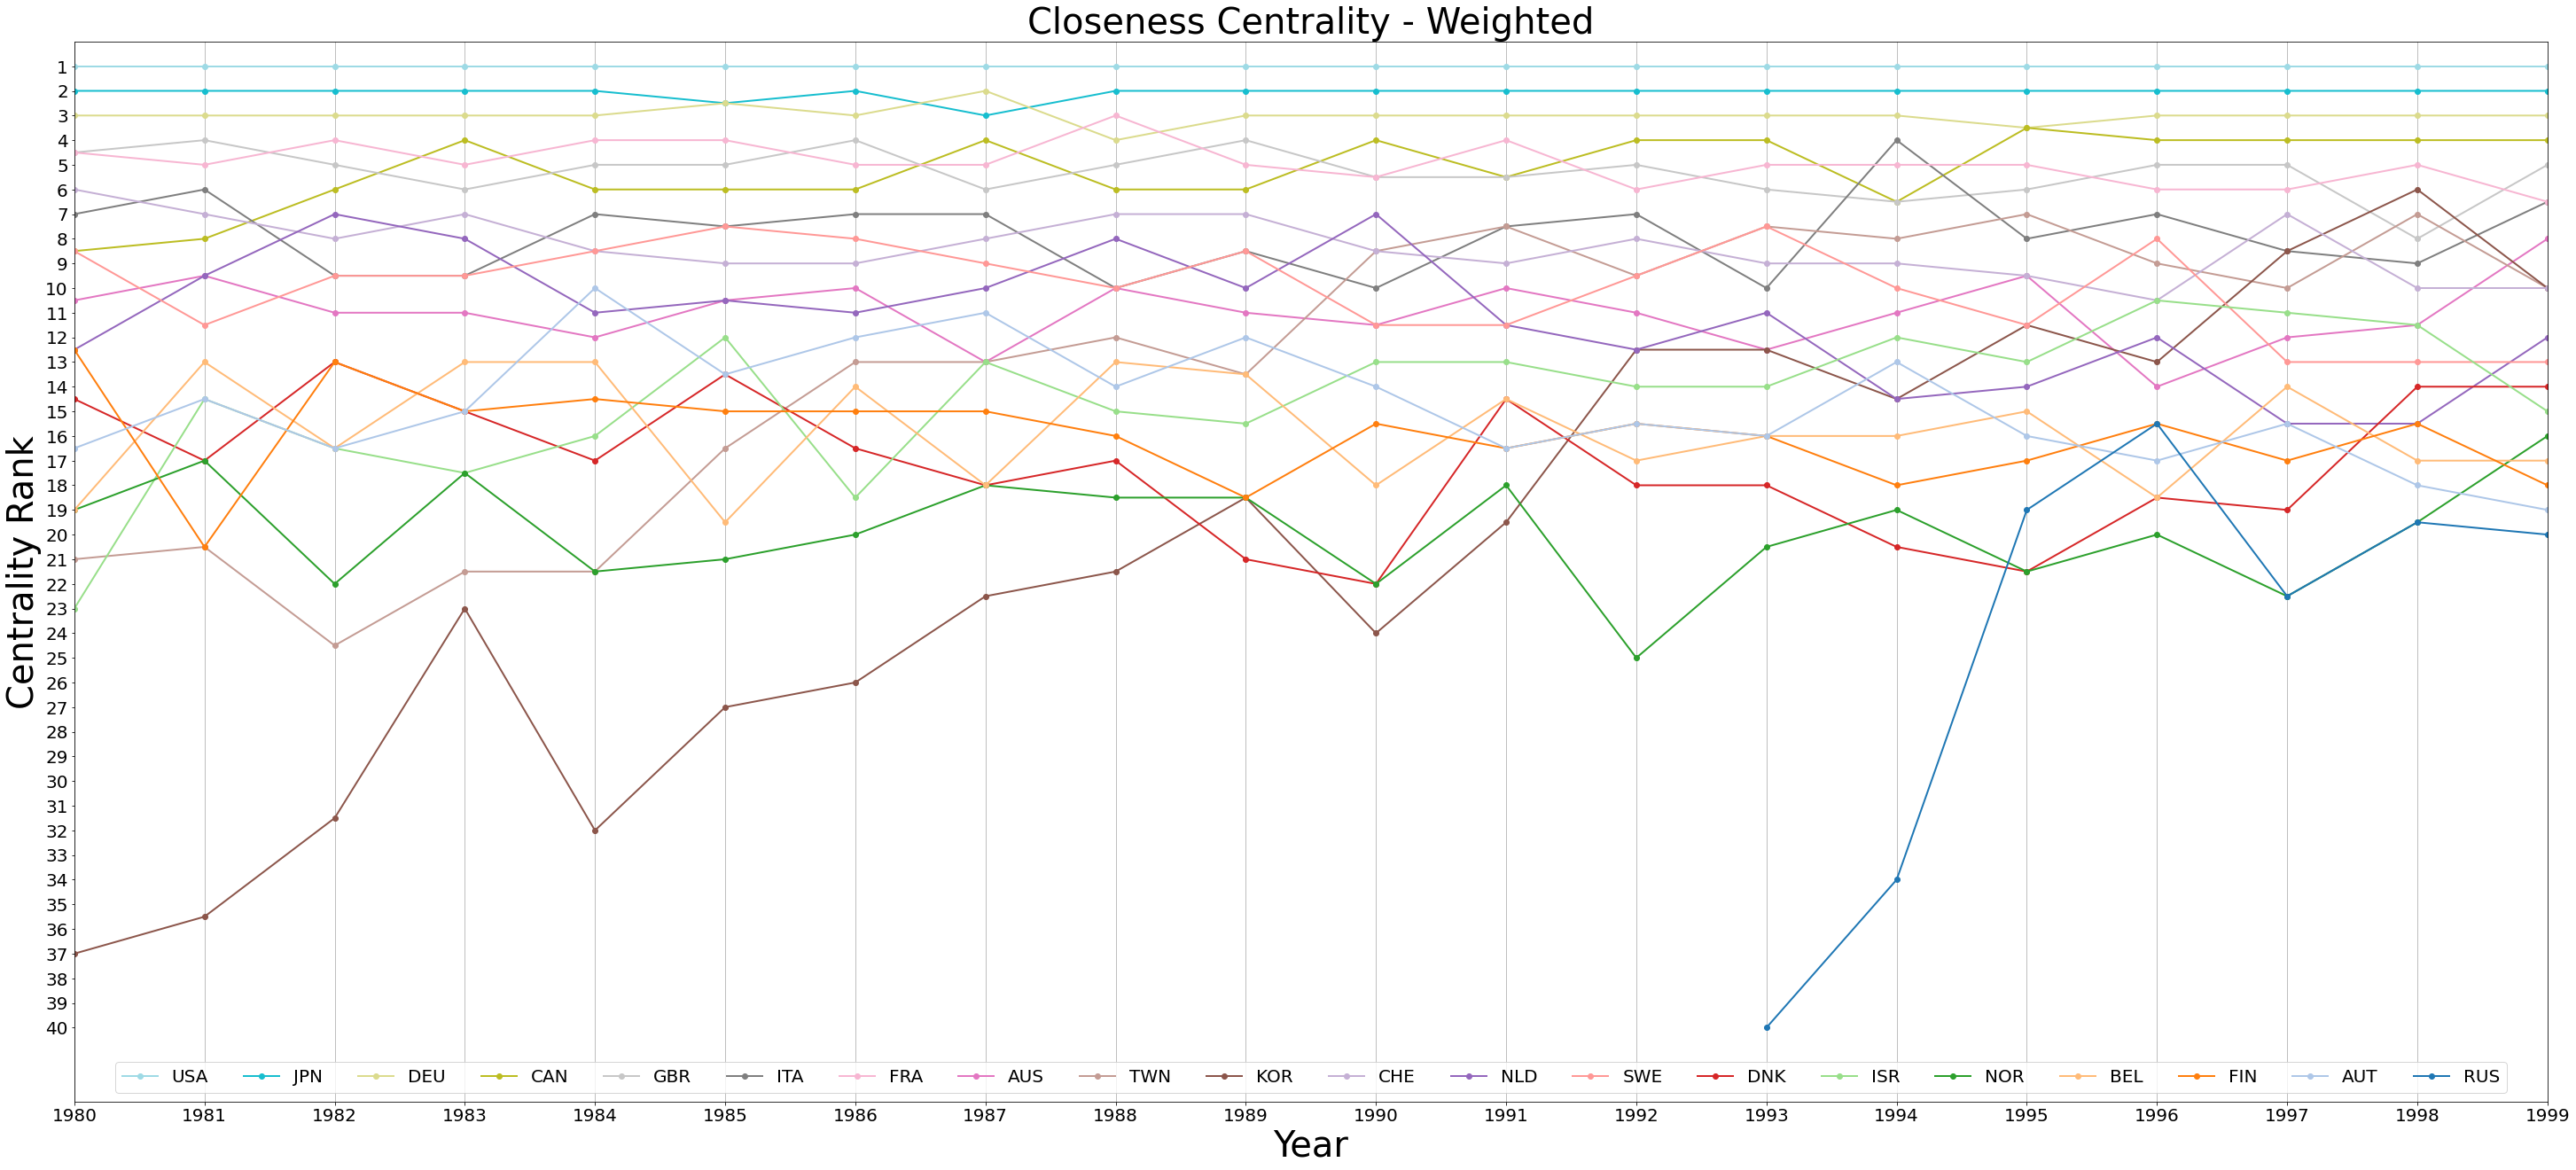

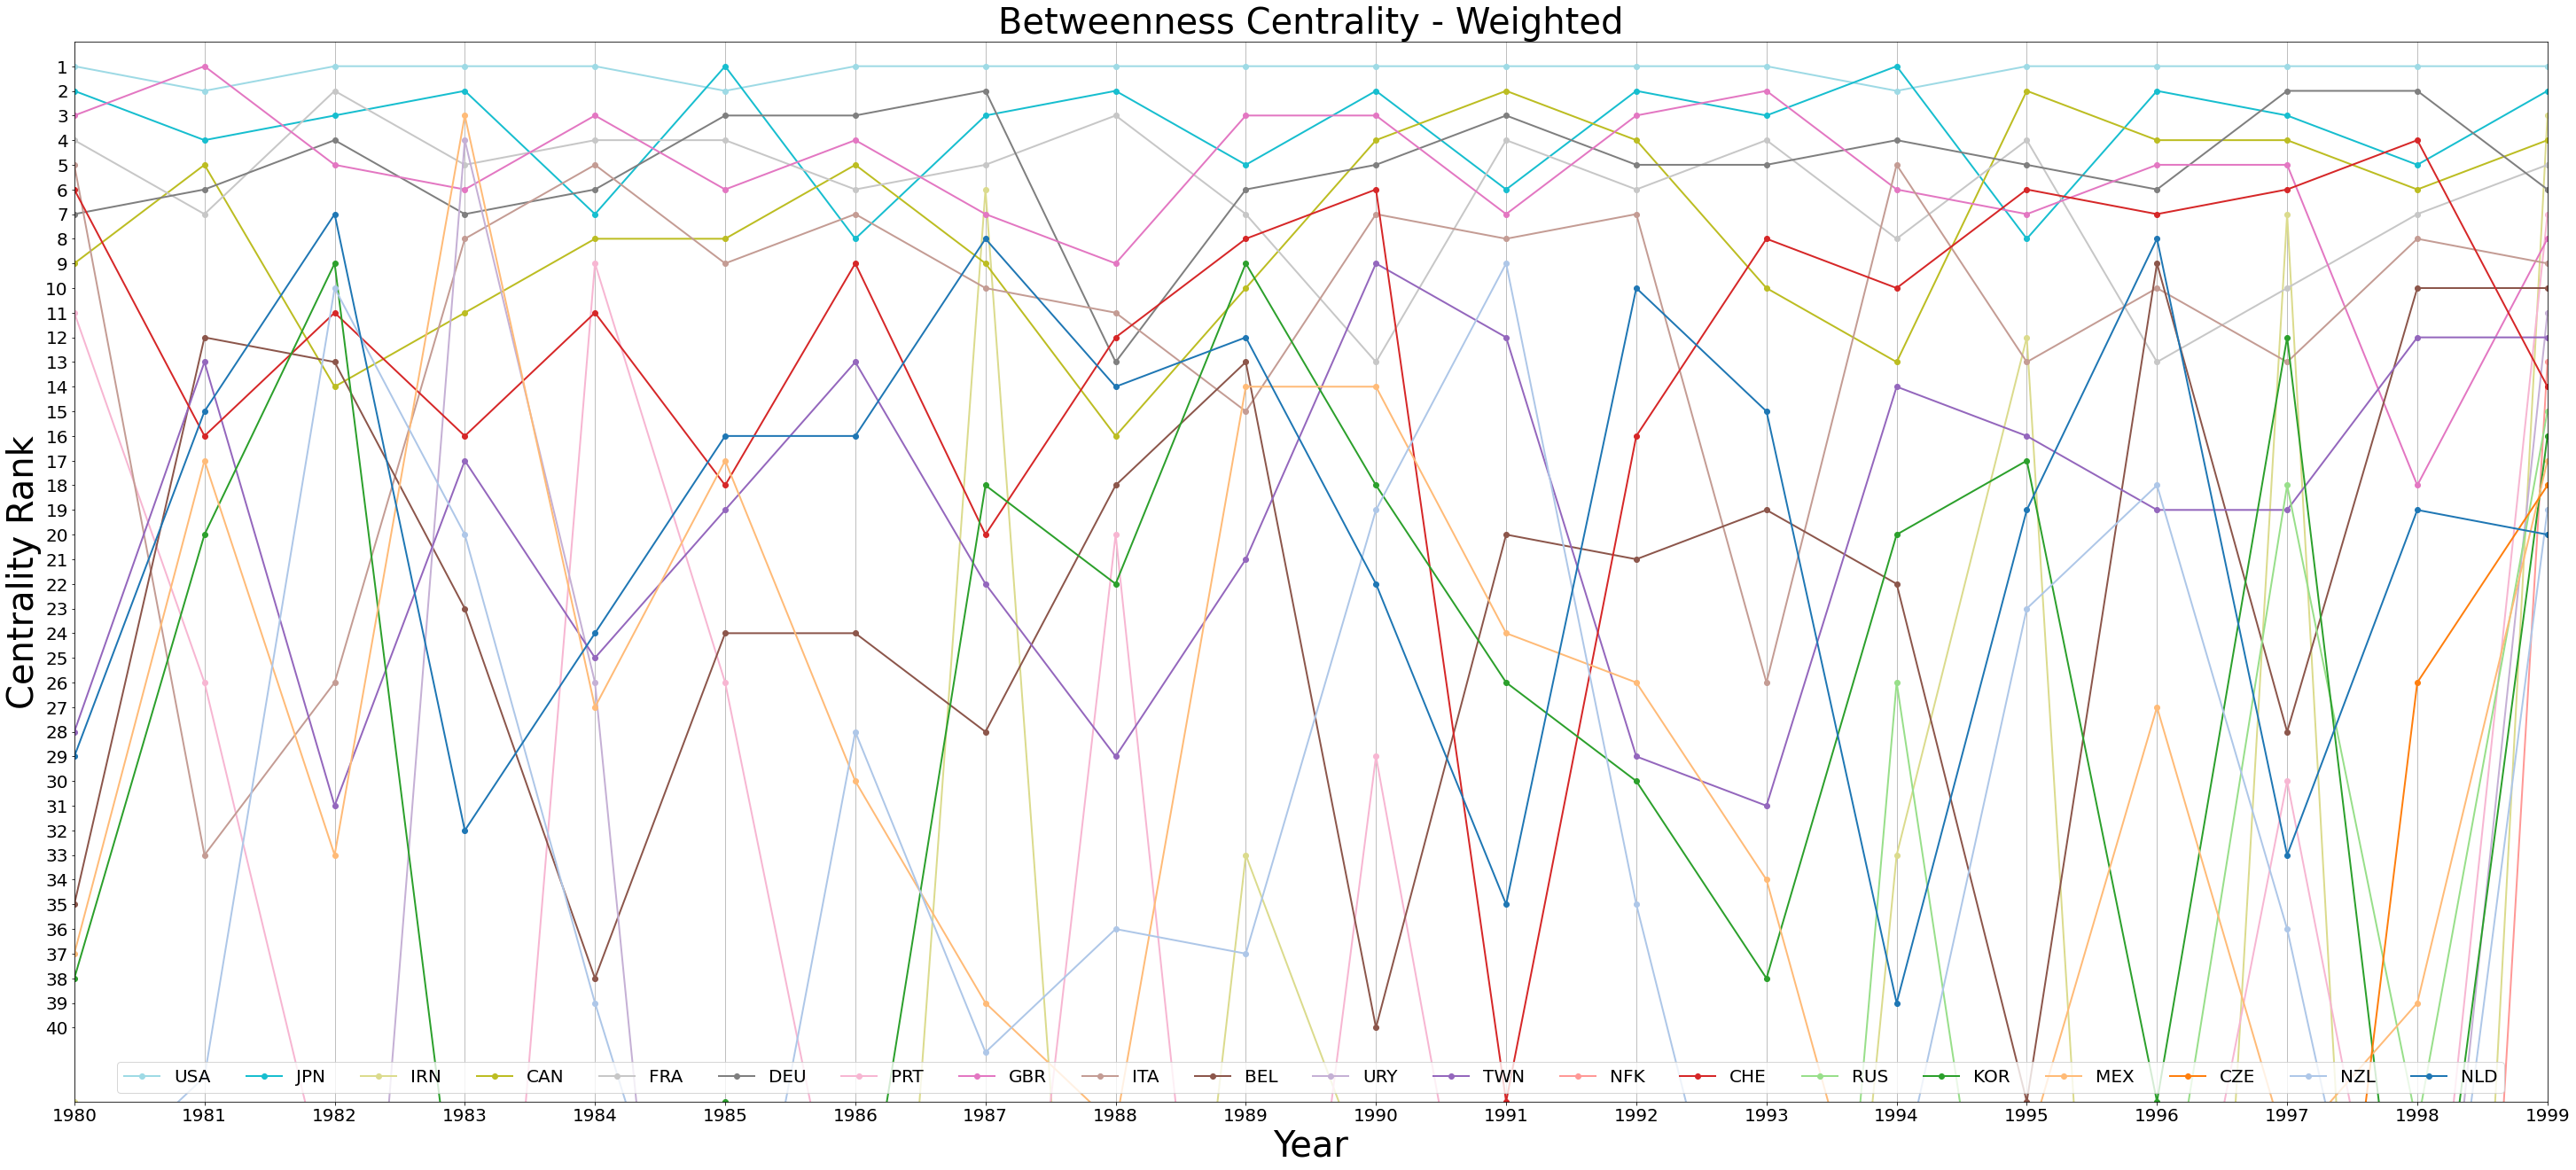

In [9]:
for i in range(len(centr_rank_dfs)):
    plot_bumpchart(df=centr_rank_dfs[i], title=centr_types[i], topN=20)